<h1 align="center" style="color: green"> Unsupervised Learning Project </h1>

***

## Phase 1:
#### On this phase you should search about one unlabeled dataset and apply PCA technique from scratch on it.
## Phase 2:
#### Apply the unsupervised learning technique you chose on your dataset before and after apply PCA.
***




***
## Dataset Insight
***
This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

CUSTID : Identification of Credit Card holder (Categorical)
BALANCE : Balance amount left in their account to make purchases (
BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES : Amount of purchases made from account
ONEOFFPURCHASES : Maximum purchase amount done in one-go
INSTALLMENTSPURCHASES : Amount of purchase done in installment
CASHADVANCE : Cash in advance given by the user
PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
PURCHASESTRX : Numbe of purchase transactions made
CREDITLIMIT : Limit of Credit Card for user
PAYMENTS : Amount of Payment done by user
MINIMUM_PAYMENTS : Minimum amount of payments made by user
PRCFULLPAYMENT : Percent of full payment paid by user
TENURE : Tenure of credit card service for user

***
## Imports
***

In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import numpy as np
import collections
import matplotlib.pyplot as plt
import queue

***
## Exploratory Analysis
***


In [2]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if
             1 < nunique[col] < 50]]  # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


In [3]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include=[np.number])  # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]  # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10:  # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center',
                          va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [4]:
df = pd.read_csv('CC GENERAL.csv')
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 8950 rows and 18 columns


In [5]:
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Distribution graphs (histogram/bar graph) of sampled columns:

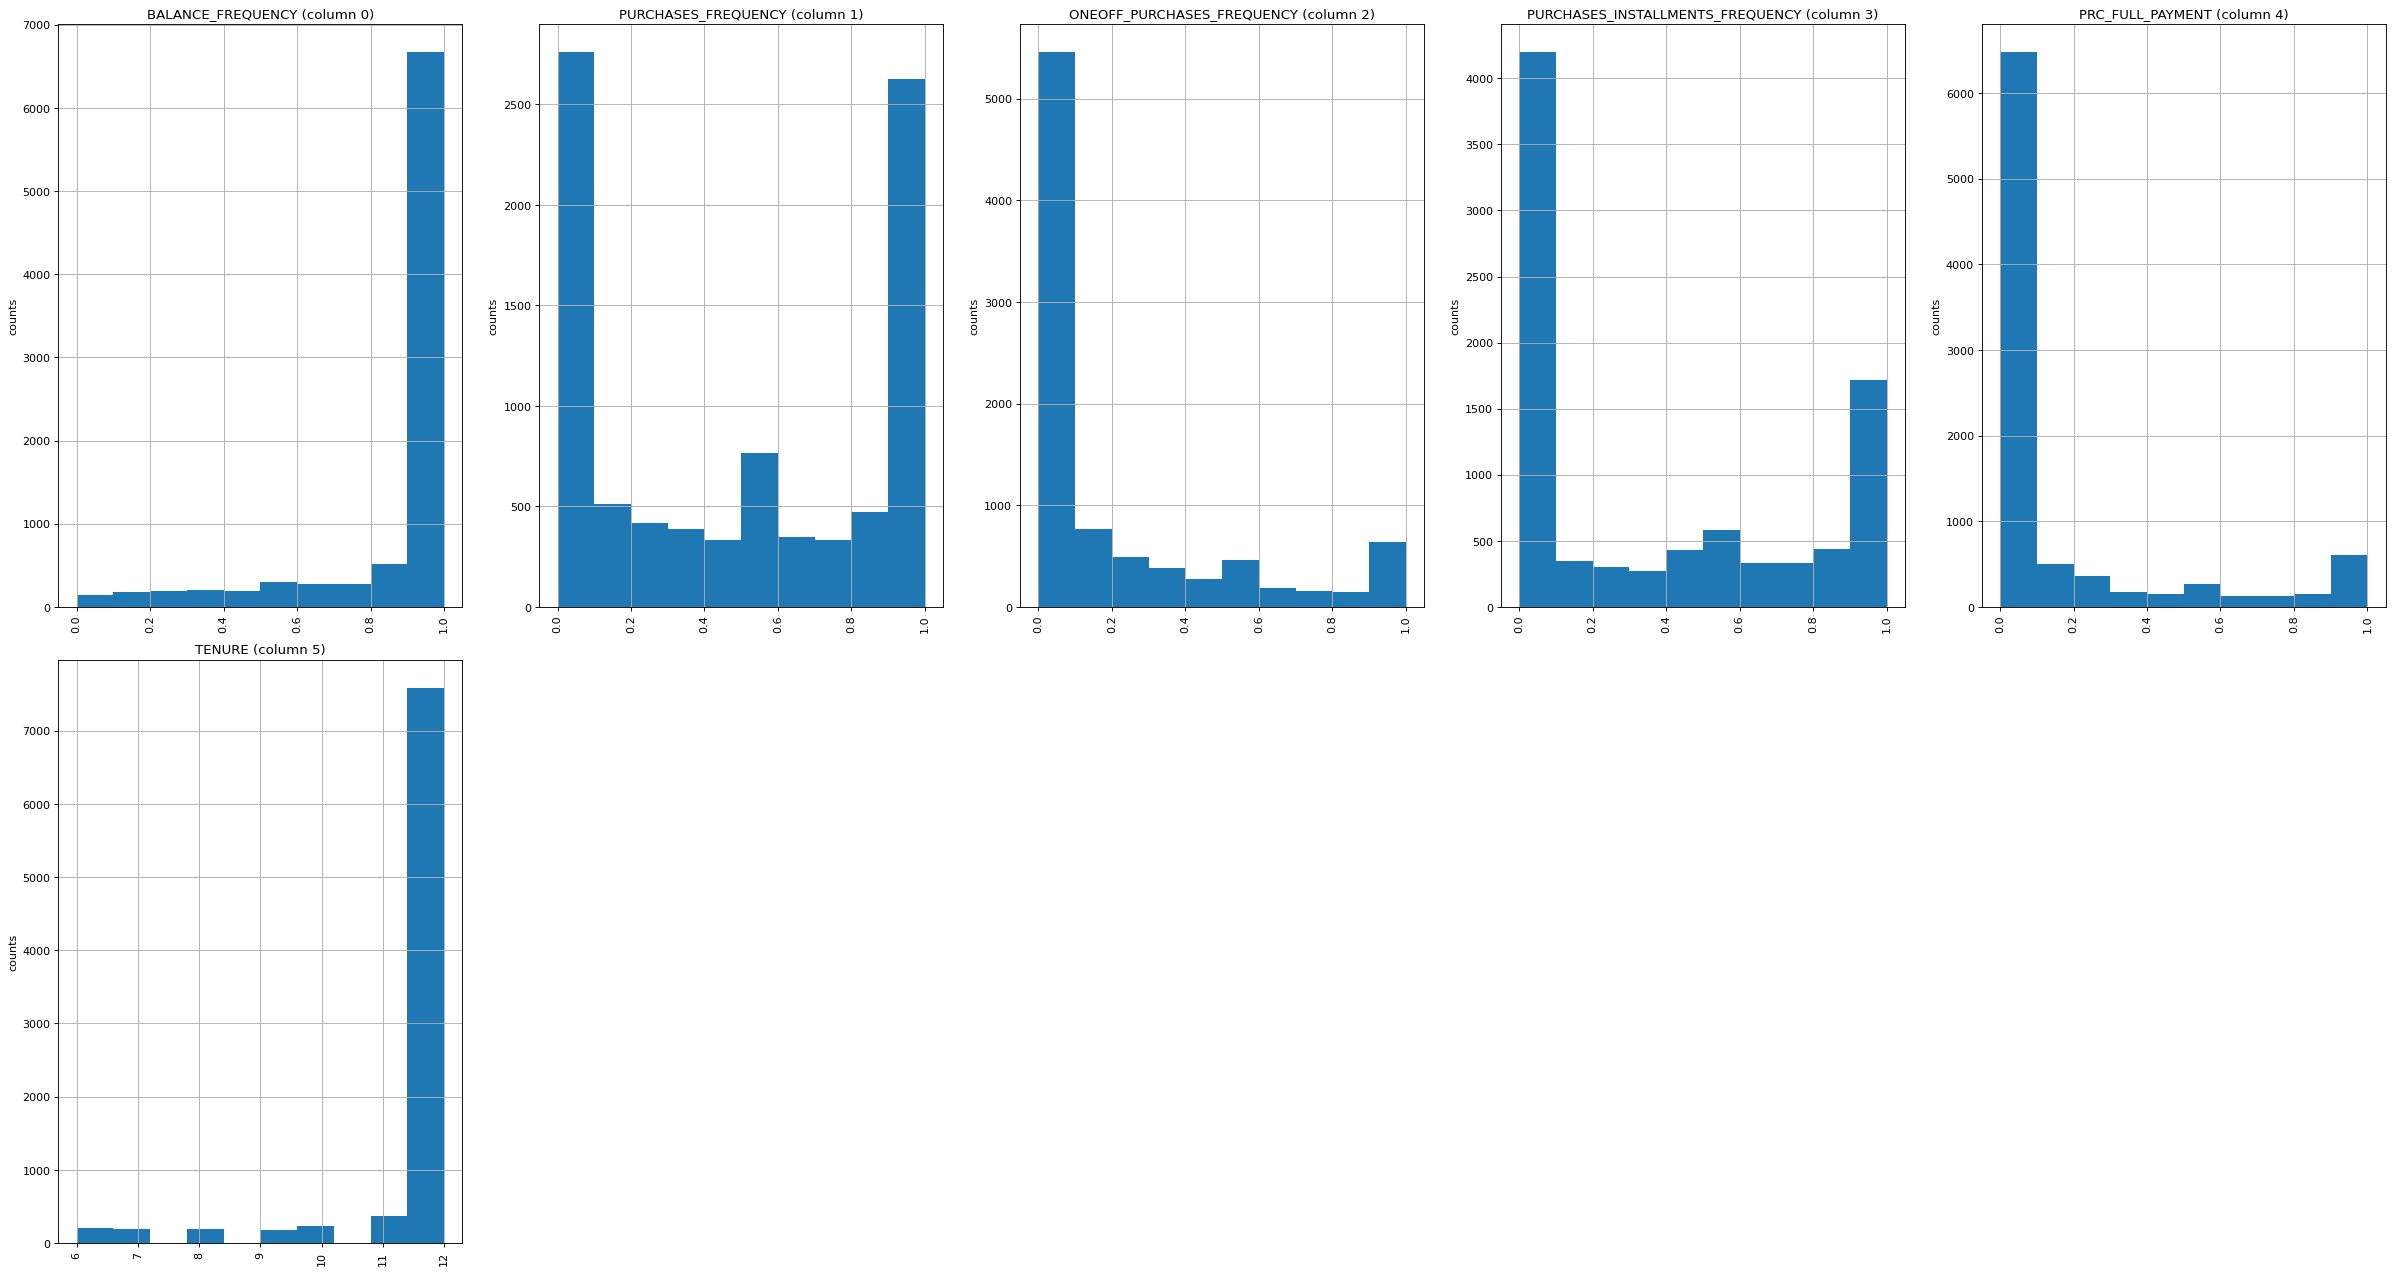

In [6]:
plotPerColumnDistribution(df, 10, 5)

Correlation matrix:

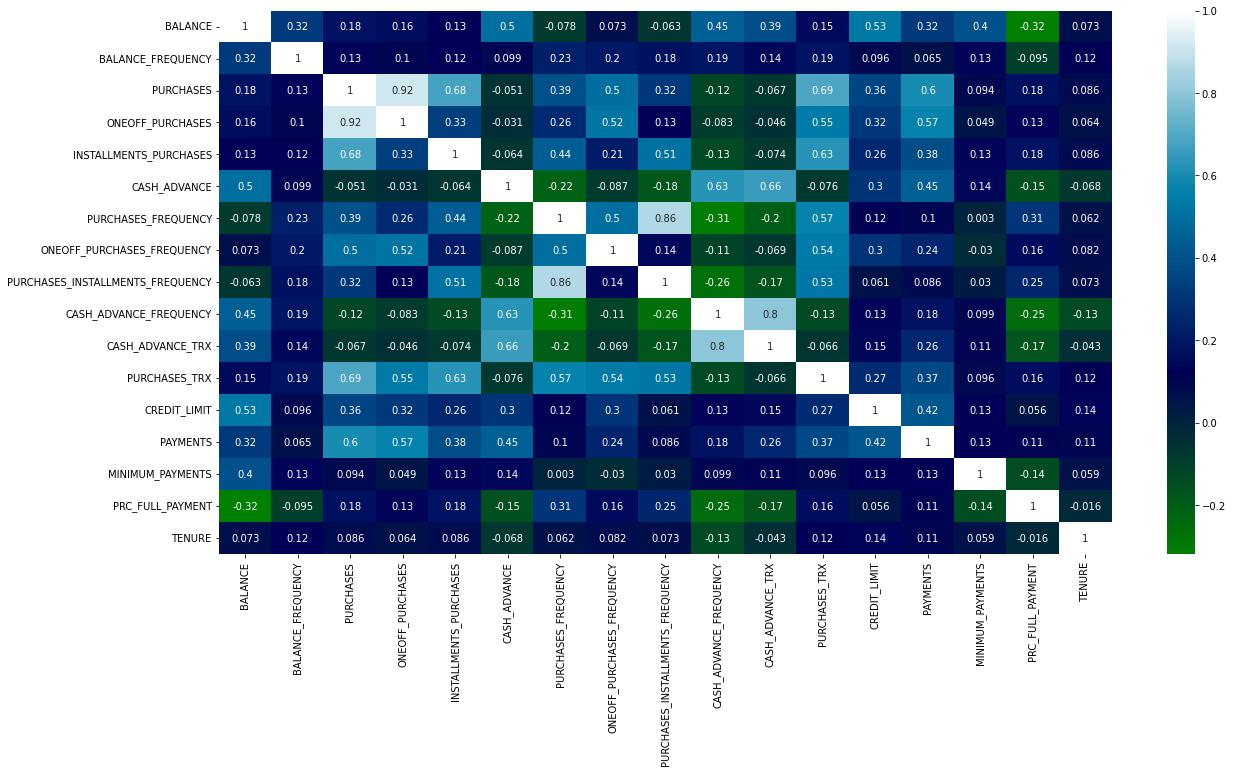

In [7]:
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='ocean')

Scatter and density plots:

<ipython-input-3-f808fa9162eb>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


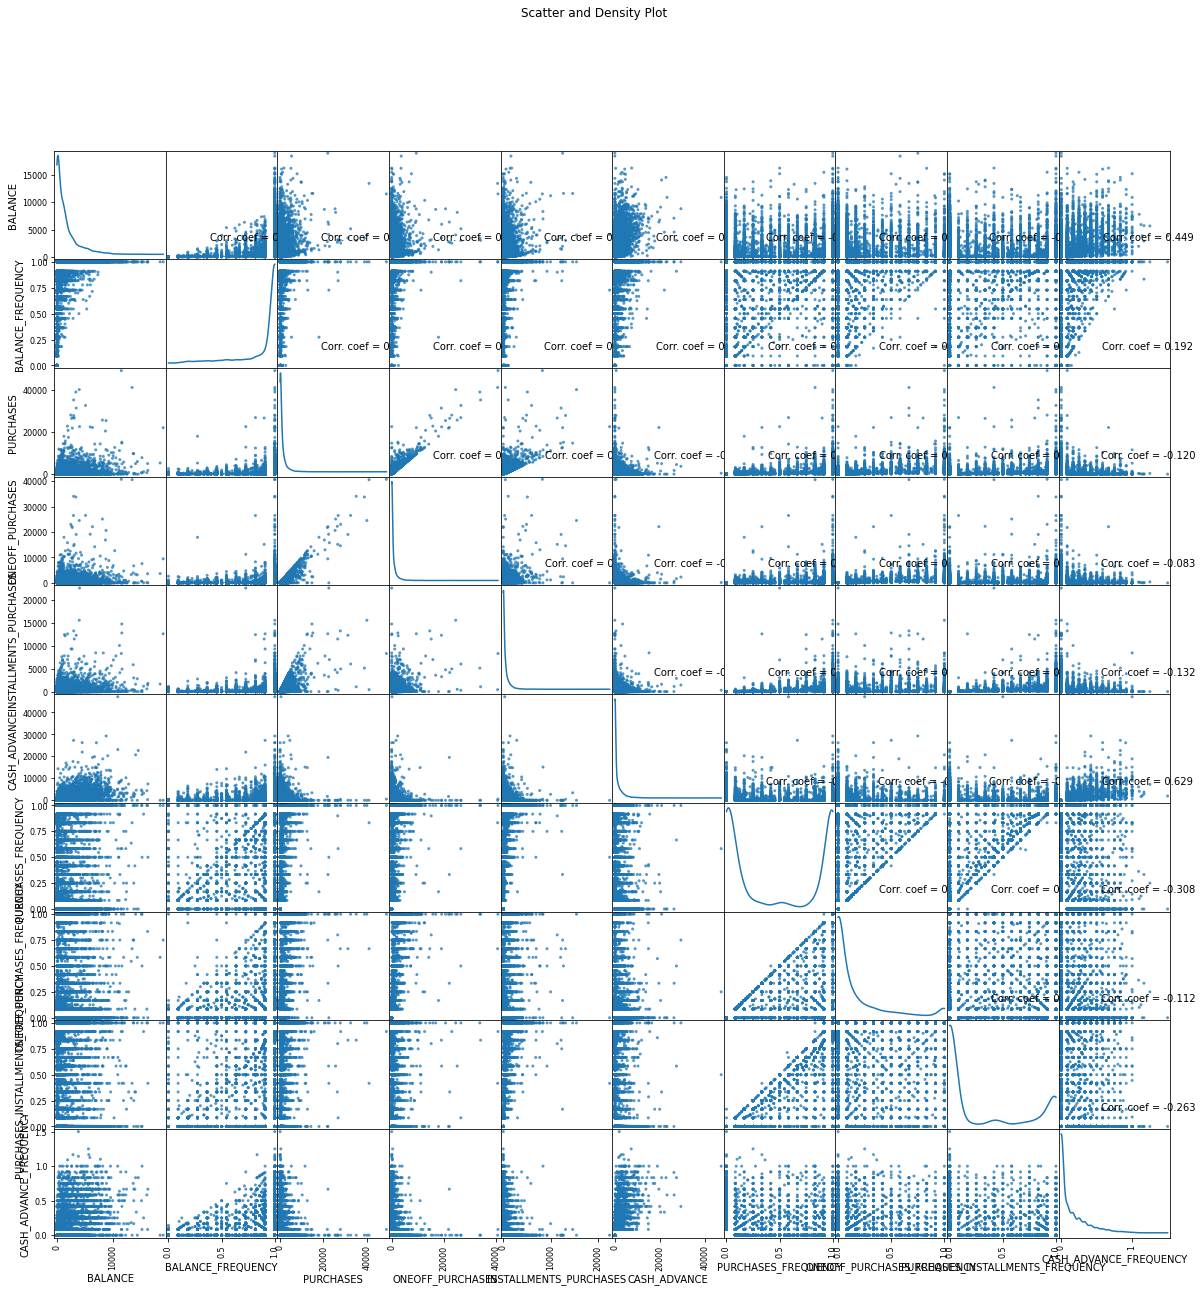

In [8]:
plotScatterMatrix(df, 20, 10)

***
## Preprocessing
***

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [10]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
df.drop(columns='CUST_ID')

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [14]:
X = df.values[:, 1:]
X = np.nan_to_num(X)
clean_data = StandardScaler().fit_transform(X)
clean_data

array([[-0.74462486, -0.37004679, -0.42918384, ..., -0.30550763,
        -0.53772694,  0.35518066],
       [ 0.76415211,  0.06767893, -0.47320819, ...,  0.08768873,
         0.21238001,  0.35518066],
       [ 0.42660239,  0.50540465, -0.11641251, ..., -0.09990611,
        -0.53772694,  0.35518066],
       ...,
       [-0.75297728, -0.29709491, -0.40657175, ..., -0.32957217,
         0.30614422, -4.22180042],
       [-0.75772142, -0.29709491, -0.47320819, ..., -0.34081076,
         0.30614422, -4.22180042],
       [-0.58627829, -1.09958965,  0.03129519, ..., -0.32709767,
        -0.53772694, -4.22180042]])

***
## DBSCAN
***
Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering.

## Use cases of DBSCAN:

*   **Recommender systems** that make recommendations to users based on preferences (such as Netflix viewing patterns) of similar users (such as neighbors).
*   **Anomaly detection** that identifies rare items, events or observations which deviate significantly from the majority of the data and do not conform to a well defined notion of normal behavior.
*   **Customer segmentation** that aims at separating customers into multiple clusters, and devise targeted marketing strategy based on each cluster's characteristics.



<h1 align="center">Metrics</h1>

***
## Silhouette Coefficient:
Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
1: Means clusters are well apart from each other and clearly distinguished.
0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
-1: Means clusters are assigned in the wrong way.

Silhouette Score = (b-a)/max(a,b)
where:
a= average intra-cluster distance i.e the average distance between each point within a cluster.
b= average inter-cluster distance i.e the average distance between all clusters.

In [15]:
NOISE = 0
UNASSIGNED = 0
core = -1
edge = -2

## Distance Function


In [16]:
def neighbor_points(data, pointId, radius):
    points = []
    for i in range(len(data)):
        if np.linalg.norm(data[i] - data[pointId]) <= radius:
            points.append(i)
    return points

## DBSCAN Function

In [17]:
def dbscan(data, Eps, MinPt):
    pointlabel = [UNASSIGNED] * len(data)
    pointcount = []
    corepoint = []
    noncore = []

    for i in range(len(data)):
        pointcount.append(neighbor_points(clean_data, i, Eps))
    for i in range(len(pointcount)):
        if len(pointcount[i]) >= MinPt:
            pointlabel[i] = core
            corepoint.append(i)
        else:
            noncore.append(i)
    for i in noncore:
        for j in pointcount[i]:
            if j in corepoint:
                pointlabel[i] = edge

                break
    cl = 1
    for i in range(len(pointlabel)):
        q = queue.Queue()
        if pointlabel[i] == core:
            pointlabel[i] = cl
            for x in pointcount[i]:
                if pointlabel[x] == core:
                    q.put(x)
                    pointlabel[x] = cl
                elif pointlabel[x] == edge:
                    pointlabel[x] = cl
            while not q.empty():
                neighbors = pointcount[q.get()]
                for y in neighbors:
                    if pointlabel[y] == core:
                        pointlabel[y] = cl
                        q.put(y)
                    if pointlabel[y] == edge:
                        pointlabel[y] = cl
            cl = cl + 1

    return pointlabel, cl


## Plotting Results of DBSCAN

In [18]:
def plotRes(data, clusterRes, clusterNum):
    nPoints = len(data)
    scatterColors = ['black', 'green', 'brown', 'red', 'purple', 'orange', 'yellow']
    for i in range(clusterNum):
        if i==0:
            # Plot all noise point as blue
            color='blue'
        else:
            color = scatterColors[i % len(scatterColors)]
        x1 = [];  y1 = []
        for j in range(nPoints):
            if clusterRes[j] == i:
                x1.append(data[j, 0])
                y1.append(data[j, 1])
        plt.scatter(x1, y1, c=color, alpha=1, marker='.')

## Fitting DBSCAN on different parameters

Set eps = 1, Min-points = 5


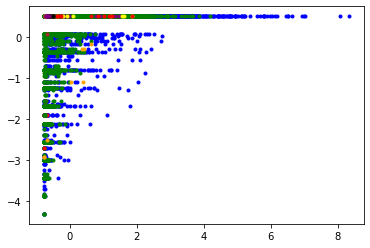

number of cluster found: 19
Counter({1: 5493, 0: 3051, 14: 7, 9: 7, 15: 7, 17: 6, 2: 6, 3: 6, 7: 5, 18: 5, 11: 5, 4: 5, 19: 5, 8: 5, 16: 4, 5: 4, 6: 4, 13: 4, 10: 4, 12: 3})
Number of outliers found: 3051

Silhouette Coefficient:-0.26
Set eps = 1, Min-points = 10


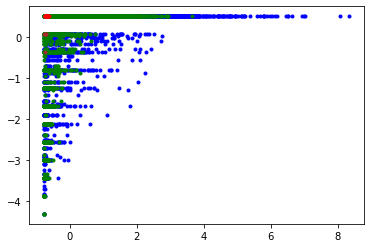

number of cluster found: 3
Counter({1: 5001, 0: 3591, 2: 34, 3: 10})
Number of outliers found: 3591

Silhouette Coefficient:0.08
Set eps = 2, Min-points = 5


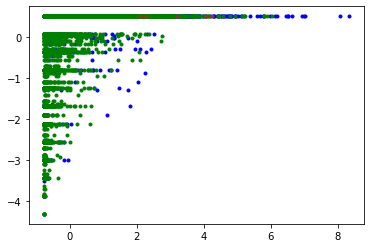

number of cluster found: 2
Counter({1: 8038, 0: 593, 2: 5})
Number of outliers found: 593

Silhouette Coefficient:0.39
Set eps = 2, Min-points = 10


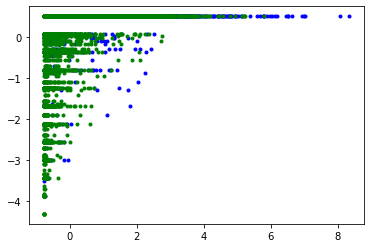

number of cluster found: 1
Counter({1: 7934, 0: 702})
Number of outliers found: 702

Silhouette Coefficient:0.46


In [19]:
from sklearn import metrics

epss = [1, 2]
minSamples = [5, 10]
for eps in epss:
    for smpls in minSamples:
        print('Set eps = ' + str(eps) + ', Min-points = ' + str(smpls))
        pointlabel, cl = dbscan(clean_data, eps, smpls)
        plotRes(clean_data, pointlabel, cl)
        plt.show()
        print('number of cluster found: ' + str(cl - 1))
        counter = collections.Counter(pointlabel)
        print(counter)
        outliers = pointlabel.count(0)
        print('Number of outliers found: ' + str(outliers) + '\n')
        sc = metrics.silhouette_score(clean_data, pointlabel)
        print("Silhouette Coefficient:%0.2f"%sc)

***
## PCA
***

In [20]:
X_std = clean_data

def covariance(x):
    return (x.T @ x)/(x.shape[0]-1)

cov_mat = covariance(X_std)

In [21]:
# Eigen decomposition of covariance matrix
eig_vals, eig_vecs = np.linalg.eigh(cov_mat)

# Adjusting the eigenvectors (loadings) that are largest in absolute value to be positive
max_abs_idx = np.argmax(np.abs(eig_vecs), axis=0)
signs = np.sign(eig_vecs[max_abs_idx, range(eig_vecs.shape[0])])
eig_vecs = eig_vecs*signs[np.newaxis,:]
eig_vecs = eig_vecs.T

print('Eigenvalues \n', eig_vals)
print('Eigenvectors \n', eig_vecs)

Eigenvalues 
 [1.17321400e-05 4.61029927e-02 1.71396366e-01 2.00395358e-01
 2.42568833e-01 3.01706671e-01 4.01893153e-01 5.23917010e-01
 6.25960921e-01 7.15907723e-01 8.35848726e-01 9.71286112e-01
 1.06714866e+00 1.28766257e+00 1.51629231e+00 3.46403341e+00
 4.62983620e+00]
Eigenvectors 
 [[-4.23479327e-05 -2.19641068e-05  7.48862215e-01 -5.82112333e-01
  -3.16781516e-01 -2.18222731e-05  1.59543970e-04 -1.42077484e-04
  -1.68735071e-04  1.56221315e-05 -1.12256419e-05  8.29771980e-05
   8.65289081e-06  1.56457779e-05 -2.86716199e-05 -2.04652618e-05
   3.48682037e-06]
 [-5.69792767e-03 -9.37862507e-03  1.48477975e-03 -5.22275967e-03
   1.39832404e-02 -8.37997608e-03  6.78750052e-01 -3.41692602e-01
  -6.32813034e-01  4.17737889e-02 -1.43679292e-02  1.34871073e-01
   1.86355639e-02  1.11411152e-02 -1.45660764e-02 -2.09942923e-02
   2.02608475e-02]
 [ 2.18995945e-01  4.36486470e-02 -6.28764571e-02 -6.81232822e-02
  -2.34759552e-02 -2.37548805e-01 -2.38857834e-02 -1.54995070e-02
  -6.7344871

In [22]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[i,:]) for i in range(len(eig_vals))]

# Then, we sort the tuples from the highest to the lowest based on eigenvalues magnitude
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# For further usage
eig_vals_sorted = np.array([x[0] for x in eig_pairs])
eig_vecs_sorted = np.array([x[1] for x in eig_pairs])
print(eig_pairs)

[(4.629836195505942, array([ 0.0919859 ,  0.10981218,  0.41215123,  0.34677536,  0.33705564,
       -0.03058765,  0.32366488,  0.29476135,  0.27722626, -0.09914541,
       -0.05696036,  0.39106653,  0.21005184,  0.26372547,  0.05932632,
        0.13056503,  0.07791867])), (3.464033407264176, array([ 0.4059787 ,  0.12773873,  0.0495303 ,  0.06992965, -0.01148132,
        0.43724688, -0.1865817 , -0.01474658, -0.17357691,  0.42999689,
        0.41641184, -0.0119466 ,  0.24382309,  0.26418176,  0.17041577,
       -0.1957089 , -0.00456558])), (1.5162923103264945, array([ 0.17415522,  0.45885334, -0.24258187, -0.3685726 ,  0.10375304,
        0.00172594,  0.35574976, -0.10474308,  0.44994026,  0.08763546,
        0.08705192,  0.07979903, -0.0951819 , -0.28792071,  0.24870622,
       -0.18419598,  0.06574319])), (1.287662565215439, array([ 0.25942307,  0.15932011,  0.06400168,  0.12314791, -0.07502838,
       -0.26556462, -0.221738  ,  0.05546399, -0.26529256, -0.26659223,
       -0.33264408

In [23]:
# Select top k eigenvectors
k = 2
W = eig_vecs_sorted[:k, :] # Projection matrix

In [24]:
print(W.shape)
n_samples, n_features = clean_data.shape
eig_vals_total = sum(eig_vals)
explained_variance = [(i / eig_vals_total)*100 for i in eig_vals_sorted]
explained_variance = np.round(explained_variance, 2)
cum_explained_variance = np.cumsum(explained_variance)
print('Explained variance: {}'.format(explained_variance))
print('Cumulative explained variance: {}'.format(cum_explained_variance))

(2, 17)
Explained variance: [27.23 20.37  8.92  7.57  6.28  5.71  4.92  4.21  3.68  3.08  2.36  1.77
  1.43  1.18  1.01  0.27  0.  ]
Cumulative explained variance: [27.23 47.6  56.52 64.09 70.37 76.08 81.   85.21 88.89 91.97 94.33 96.1
 97.53 98.71 99.72 99.99 99.99]


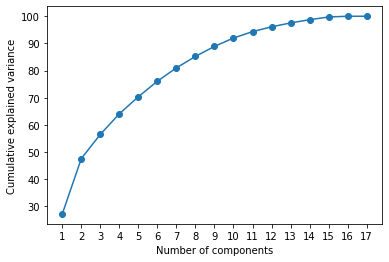

In [25]:
plt.plot(np.arange(1,n_features+1), cum_explained_variance, '-o')
plt.xticks(np.arange(1,n_features+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

In [26]:
X_proj = X_std.dot(W.T)
print(X_proj.shape)

(8636, 2)


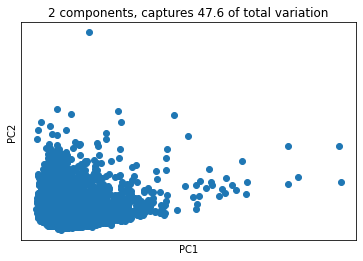

In [27]:
plt.scatter(X_proj[:, 0], X_proj[:, 1])
plt.xlabel('PC1'); plt.xticks([])
plt.ylabel('PC2'); plt.yticks([])
plt.title('2 components, captures {} of total variation'.format(cum_explained_variance[1]))
plt.show()

## DBSCAN After PCA

Set eps = 1, Min-points = 5


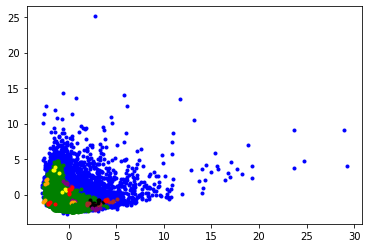

Number of cluster found: 19
Counter({1: 5493, 0: 3051, 14: 7, 9: 7, 15: 7, 17: 6, 2: 6, 3: 6, 7: 5, 18: 5, 11: 5, 4: 5, 19: 5, 8: 5, 16: 4, 5: 4, 6: 4, 13: 4, 10: 4, 12: 3})
Number of outliers found: 3051

Silhouette Coefficient:-0.26
Set eps = 1, Min-points = 10


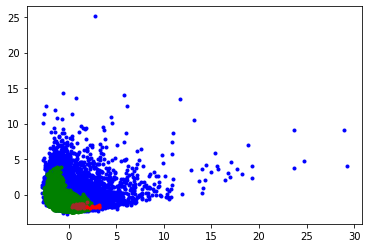

Number of cluster found: 3
Counter({1: 5001, 0: 3591, 2: 34, 3: 10})
Number of outliers found: 3591

Silhouette Coefficient:0.08
Set eps = 2, Min-points = 5


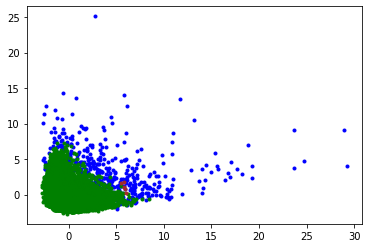

Number of cluster found: 2
Counter({1: 8038, 0: 593, 2: 5})
Number of outliers found: 593

Silhouette Coefficient:0.39
Set eps = 2, Min-points = 10


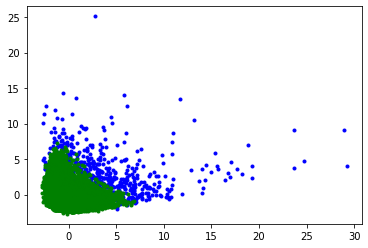

Number of cluster found: 1
Counter({1: 7934, 0: 702})
Number of outliers found: 702

Silhouette Coefficient:0.46


In [28]:
epss = [1, 2]
minSamples = [5, 10]
for eps in epss:
    for smpls in minSamples:
        print('Set eps = ' + str(eps) + ', Min-points = ' + str(smpls))
        pointlabel, cl = dbscan(X_proj, eps, smpls)
        plotRes(X_proj, pointlabel, cl)
        plt.show()
        print('Number of cluster found: ' + str(cl - 1))
        counter = collections.Counter(pointlabel)
        print(counter)
        outliers = pointlabel.count(0)
        print('Number of outliers found: ' + str(outliers) + '\n')
        sc = metrics.silhouette_score(clean_data, pointlabel)
        print("Silhouette Coefficient:%0.2f"%sc)